In [2]:
import random

# Inventory probabilities
inventory_data = {
    15: 0.12,
    25: 0.25,
    35: 0.35,
    40: 0.20,
    42: 0.06,
    55: 0.02
}

# Convert to cumulative probabilities for simulation
inventory_values = list(inventory_data.keys())
probabilities = list(inventory_data.values())
cumulative_probs = [sum(probabilities[:i+1]) for i in range(len(probabilities))]

def simulate_inventory():
    r = random.random()
    for val, cum_prob in zip(inventory_values, cumulative_probs):
        if r <= cum_prob:
            return val
    return inventory_values[-1]

weeks = 60
order_weeks = weeks // 2
orders = []
holding_cost = 0

for _ in range(order_weeks):
    inventory = simulate_inventory()
    order_size = 100 - inventory
    orders.append(order_size)
    holding_cost += inventory * 2 * 1  # 2 weeks of holding

average_order_size = sum(orders) / len(orders)
average_holding_cost = holding_cost / order_weeks

print(f"Average Order Size: {average_order_size}")
print(f"Average Holding Cost per Order: ${average_holding_cost:.2f}")


Average Order Size: 67.03333333333333
Average Holding Cost per Order: $65.93


Problem 1 Results:
Server Utilization: 69.92%
Average Waiting Time: 0.29 units
Average Queue Length: 0.66 customers


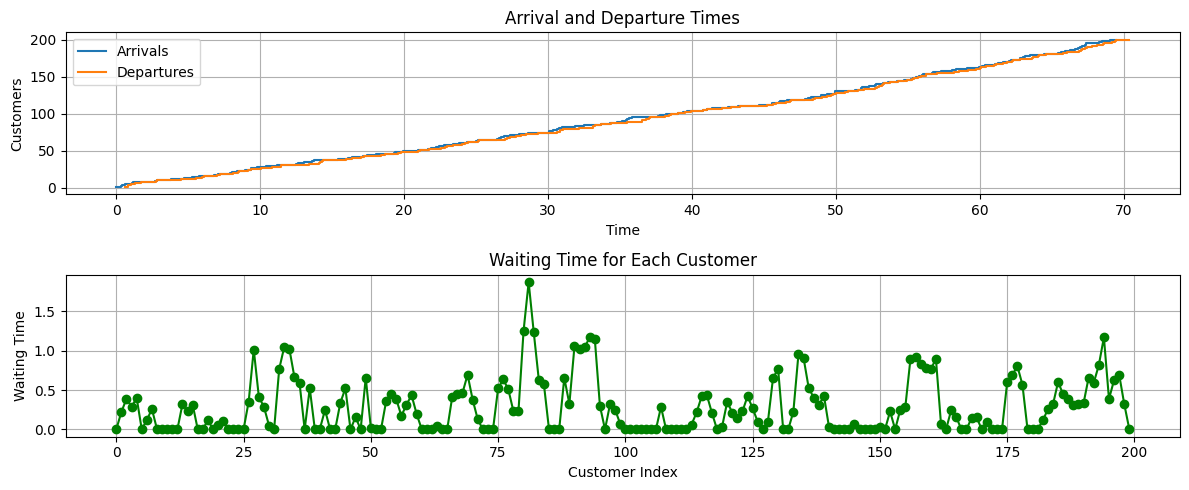

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_mm1_queue(lambda_rate, mu_rate, n_customers):
    """Simulates an M/M/1 queue and returns performance metrics and times."""
    # Generate arrival and service times
    inter_arrival = np.random.exponential(1 / lambda_rate, n_customers)
    service_times = np.random.exponential(1 / mu_rate, n_customers)
    arrival_times = np.cumsum(inter_arrival)

    start_times = np.zeros(n_customers)
    end_times = np.zeros(n_customers)

    # First customer
    start_times[0] = arrival_times[0]
    end_times[0] = start_times[0] + service_times[0]

    # Process remaining customers
    for i in range(1, n_customers):
        start_times[i] = max(arrival_times[i], end_times[i - 1])
        end_times[i] = start_times[i] + service_times[i]

    waiting_times = start_times - arrival_times
    utilization = np.sum(service_times) / end_times[-1]
    avg_waiting_time = np.mean(waiting_times)
    avg_queue_length = np.mean(waiting_times > 0)

    return {
        "arrival_times": arrival_times,
        "start_times": start_times,
        "end_times": end_times,
        "waiting_times": waiting_times,
        "utilization": utilization,
        "avg_waiting_time": avg_waiting_time,
        "avg_queue_length": avg_queue_length
    }

def plot_queue_metrics(arrival_times, end_times, waiting_times):
    """Plots arrival/departure and waiting time charts."""
    n_customers = len(arrival_times)
    plt.figure(figsize=(12, 5))

    # Plot arrivals and departures
    plt.subplot(2, 1, 1)
    plt.step(arrival_times, np.arange(1, n_customers + 1), label='Arrivals', where='post')
    plt.step(end_times, np.arange(1, n_customers + 1), label='Departures', where='post')
    plt.xlabel('Time')
    plt.ylabel('Customers')
    plt.title('Arrival and Departure Times')
    plt.legend()
    plt.grid(True)

    # Plot waiting times
    plt.subplot(2, 1, 2)
    plt.plot(range(n_customers), waiting_times, 'go-', label='Waiting Time')
    plt.xlabel('Customer Index')
    plt.ylabel('Waiting Time')
    plt.title('Waiting Time for Each Customer')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Parameters
lambda_rate = 3
mu_rate = 4
n_customers = 200

# Run simulation
results = simulate_mm1_queue(lambda_rate, mu_rate, n_customers)

# Display performance metrics
print("Problem 1 Results:")
print(f"Server Utilization: {results['utilization'] * 100:.2f}%")
print(f"Average Waiting Time: {results['avg_waiting_time']:.2f} units")
print(f"Average Queue Length: {results['avg_queue_length']:.2f} customers")

# Plot results
plot_queue_metrics(results['arrival_times'], results['end_times'], results['waiting_times'])


Problem 2:
Server Utilization: 100.00%
Average Waiting Time: 3.57 units
Average Queue Length: 0.98 customers


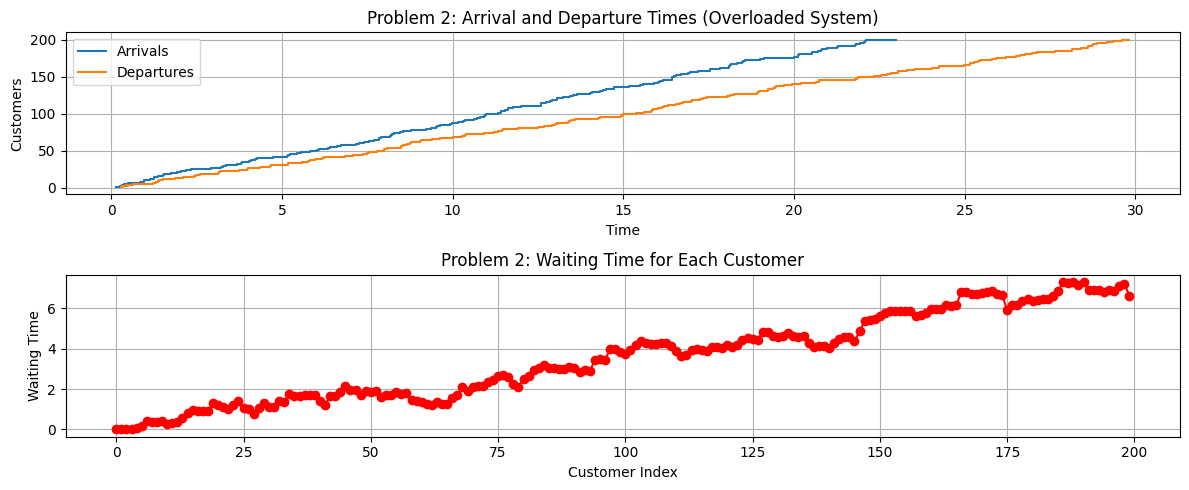

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
λ, μ, N = 8, 6, 200
arrivals = np.cumsum(np.random.exponential(1/λ, N))
services = np.random.exponential(1/μ, N)

start = np.maximum.accumulate(np.maximum(arrivals, np.concatenate(([0], np.cumsum(services)[:-1]))))
end = start + services
wait = start - arrivals

# Metrics
utilization = services.sum() / end[-1]
avg_wait = wait.mean()
queue_len = np.mean(wait > 0)

print("Problem 2:")
print(f"Server Utilization: {utilization*100:.2f}%")
print(f"Average Waiting Time: {avg_wait:.2f} units")
print(f"Average Queue Length: {queue_len:.2f} customers")

# Plots
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrivals, np.arange(1, N+1), where='post', label='Arrivals')
plt.step(end, np.arange(1, N+1), where='post', label='Departures')
plt.title('Problem 2: Arrival and Departure Times (Overloaded System)')
plt.xlabel('Time'); plt.ylabel('Customers'); plt.grid(True); plt.legend()

plt.subplot(2,1,2)
plt.plot(range(N), wait, 'ro-', label='Waiting Time')
plt.title('Problem 2: Waiting Time for Each Customer')
plt.xlabel('Customer Index'); plt.ylabel('Waiting Time'); plt.grid(True)
plt.tight_layout(); plt.show()


Problem 3 (Limited Queue Capacity = 10):
Total Customers: 200
Accepted Customers: 198
Rejected Customers: 2
Server Utilization: 70.75%
Average Waiting Time: 1.00 units
Average Queue Length: 0.89 customers


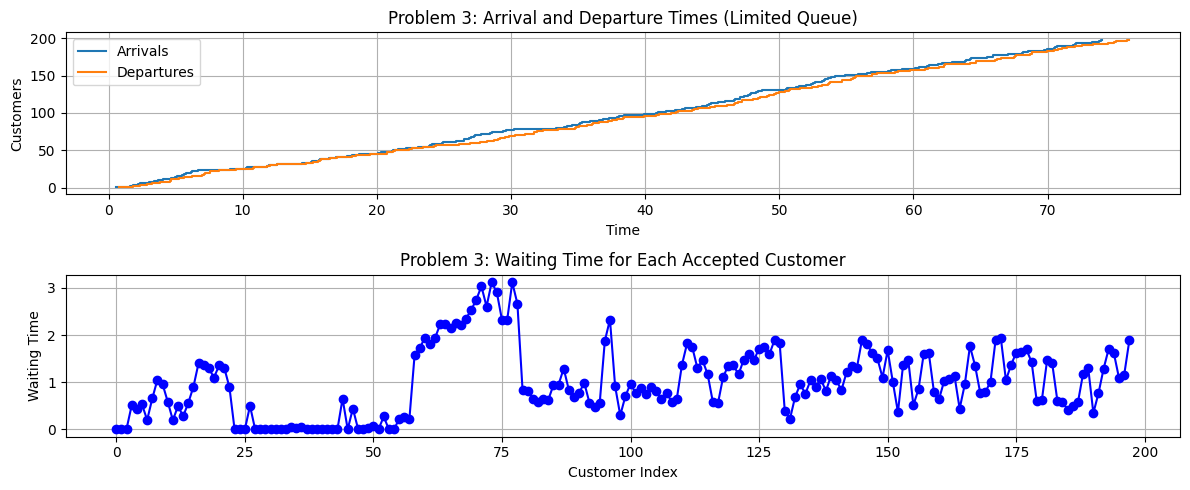

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
λ, μ, N, K = 3, 4, 200, 10
arrivals = np.cumsum(np.random.exponential(1/λ, N))
services = np.random.exponential(1/μ, N)

start_times, end_times, queue = [], [], []
rejected = 0
server_time = 0

for i in range(N):
    arrivals_in_queue = [t for t in queue if t > arrivals[i]]
    if len(arrivals_in_queue) < K:
        start = max(arrivals[i], server_time)
        end = start + services[i]
        server_time = end
        queue = arrivals_in_queue + [end]
        start_times.append(start)
        end_times.append(end)
    else:
        rejected += 1

start_times, end_times = np.array(start_times), np.array(end_times)
waiting = start_times - arrivals[:len(start_times)]
util = np.sum(services[:len(end_times)]) / end_times[-1]
avg_wait = np.mean(waiting)
queue_len = np.mean(waiting > 0)

print("Problem 3 (Limited Queue Capacity = 10):")
print(f"Total Customers: {N}")
print(f"Accepted Customers: {len(end_times)}")
print(f"Rejected Customers: {rejected}")
print(f"Server Utilization: {util*100:.2f}%")
print(f"Average Waiting Time: {avg_wait:.2f} units")
print(f"Average Queue Length: {queue_len:.2f} customers")

# Plot
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrivals[:len(end_times)], np.arange(1, len(end_times)+1), where='post', label='Arrivals')
plt.step(end_times, np.arange(1, len(end_times)+1), where='post', label='Departures')
plt.xlabel('Time'); plt.ylabel('Customers'); plt.grid(); plt.legend()
plt.title('Problem 3: Arrival and Departure Times (Limited Queue)')

plt.subplot(2,1,2)
plt.plot(range(len(end_times)), waiting, 'bo-', label='Waiting Time')
plt.xlabel('Customer Index'); plt.ylabel('Waiting Time'); plt.grid()
plt.title('Problem 3: Waiting Time for Each Accepted Customer')

plt.tight_layout(); plt.show()
